## Cluster Analysis

--------------

### K-Means Cluster Analysis

##### Import libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


##### Dataset Info
Consider a boutique financial advising company called Nest Egg that provides personalized financial advice to its clients. As a basis for developing this tailored advice, Nest Egg would like to segment its clients into groups so that clients within a group are similar with respect to their age and income. The file nestegg contains age (measured in years) and income (measured in dollars) for a sample of 44 clients.

##### Import the dataset

In [27]:
df = pd.read_csv('nestegg.csv')
df.head()

,Age,Income
0,22,25770
1,23,27805
2,25,25281
3,28,28757
4,32,31993


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     44 non-null     int64
 1   Income  44 non-null     int64
dtypes: int64(2)
memory usage: 836.0 bytes


##### Standardizing the data

In [29]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

##### Finding the optimal number of clusters - Elbow Method

In [30]:
wcss = []
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # WCSS (Within-Cluster Sum of Squares)

##### Plotting the Elbow Method graph

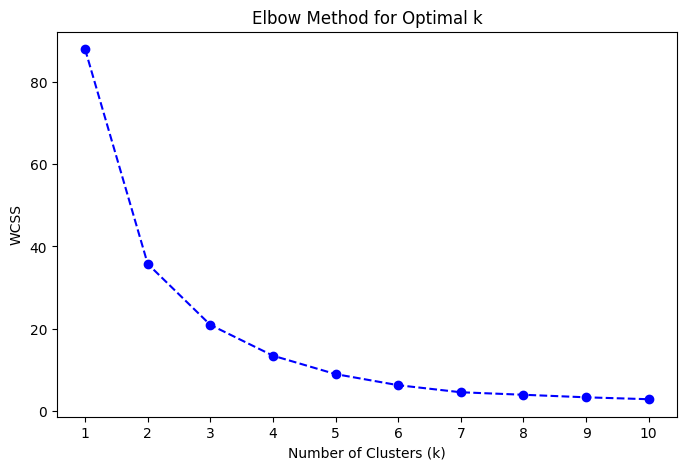

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()

##### Finding the optimal number of clusters - Silhouette Method

In [32]:
silhouette_scores = []
k_range = range(2, 11)  # Silhouette requires at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))


##### Plotting the Silhouette Method graph

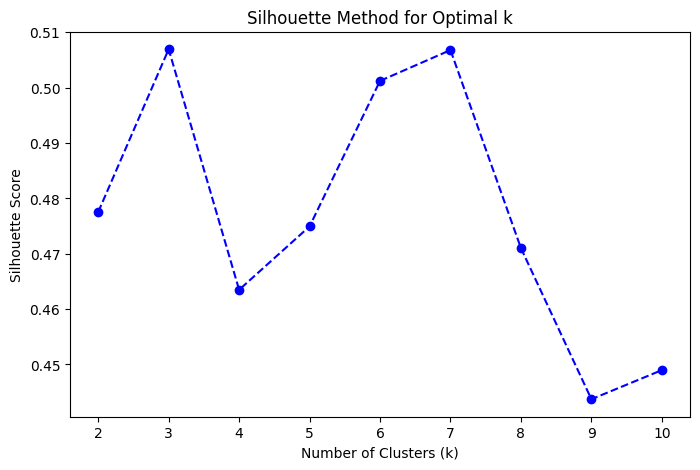

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.xticks(k_range)
plt.show()

##### Applying K-Means Clustering

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

##### Plotting the clusters

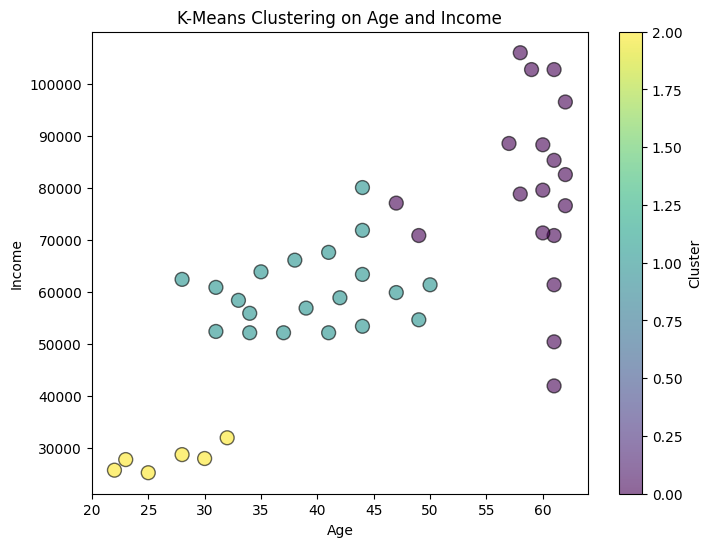

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Income'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering on Age and Income')
plt.colorbar(label='Cluster')
plt.show()

-----

### Hierarchical Cluster Analysis

##### Creating the dendrogram

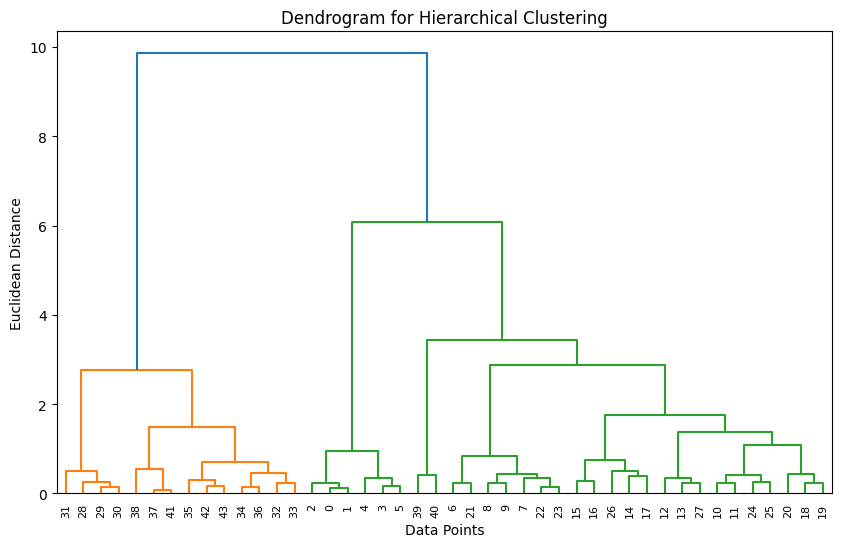

In [36]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

##### Applying Agglomerative Clustering with the corrected parameter

In [37]:
num_clusters = 3  # Adjust based on the dendrogram
hc = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(df_scaled)

##### Visualizing the clusters

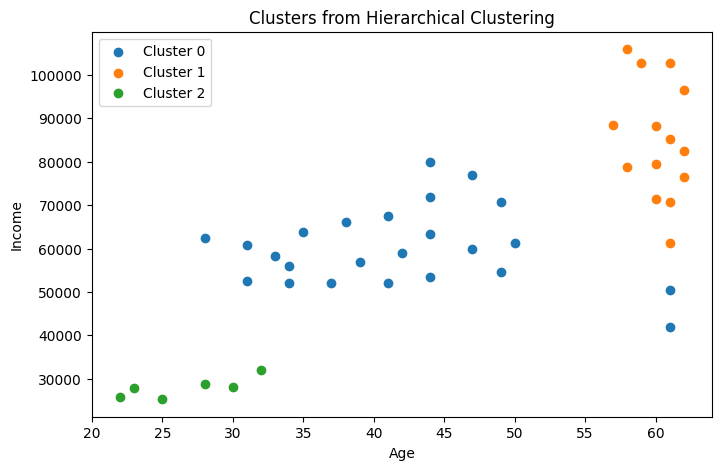

In [38]:
df['Cluster'] = labels

plt.figure(figsize=(8, 5))
for cluster in range(num_clusters):
    plt.scatter(df[df['Cluster'] == cluster]['Age'], df[df['Cluster'] == cluster]['Income'], label=f'Cluster {cluster}')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters from Hierarchical Clustering')
plt.legend()
plt.show()

-------